### Libraries used

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Functions and constants

In [213]:
global alpha, T, m, n, H, Q, Z
n = 10
H = n*n
alpha = 0
T = 0
m = 0.5

In [14]:
def utility(N):
    pho = N/H
    if(pho <= 0.5):
        res = 2*pho
    else:
        res = 2*(m-1)*pho + (2 - m)
    return res

In [58]:
def compute_gain(N_1, N_2, case):
    if(case == 'minus'):
        agent_utility = utility(N_1)
        new_agent_utility = utility(N_2 + 1)
        delta_agent_utility = new_agent_utility - agent_utility
    elif(case == 'plus'):
        agent_utility = utility(N_2)
        new_agent_utility = utility(N_1 + 1)
        delta_agent_utility = new_agent_utility - agent_utility
        
    return delta_agent_utility

In [59]:
def probability(N_1, N_2, case):
    
    gain = compute_gain(N_1, N_2, case)
    
    if(T == 0):
        if gain < 0:
            prob = 0
        elif gain > 0:
            prob = 1
        else:
            prob = 0.5
            
    else:
        exp = np.exp(-gain/T)
        prob = 1/(1+exp)
        
    return prob

In [63]:
def create_matrix(N):
    M = np.zeros((N+1, N+1))
    
    if N/(2*H) >= 0.5:
        i_min = N - H
        i_max = H
    else:
        i_min = 0
        i_max = N
    
    for i in range(i_min, i_max+1):
        M_i_plus  = ((N-i) * (H-i))/(H*H) * probability(i, N - i, 'plus')
        M_i_minus = (i * (H-N+i))/(H*H) * probability(i, N - i, 'minus')
        M_i_i = 1 - M_i_plus - M_i_minus
        
        if(i == i_min):
            M[i,i] = M_i_i
            M[i, i+1] = M_i_plus
        
        elif(i == i_max):
            M[i,i] = M_i_i
            M[i, i-1] = M_i_minus
            
        else:
            M[i,i] = M_i_i
            M[i, i-1] = M_i_minus
            M[i, i+1] = M_i_plus
        
    return M

In [161]:
def initial_vector(i_min, i_max, N):
    array = np.zeros(i_max - i_min + 1)
    array[N - i_min] = 1
    return array

### Analysis

200 100 0.5

0.003415879689515239
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1.]
1.0
1.0000495255929682
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 

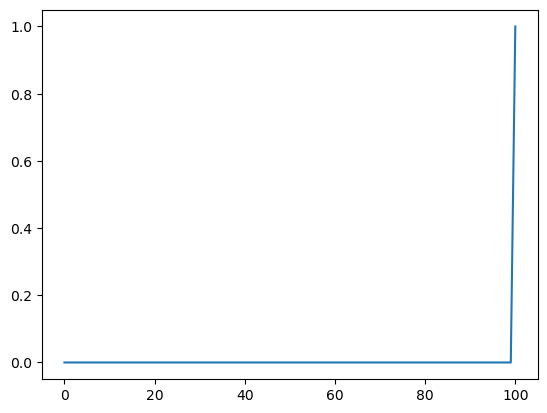

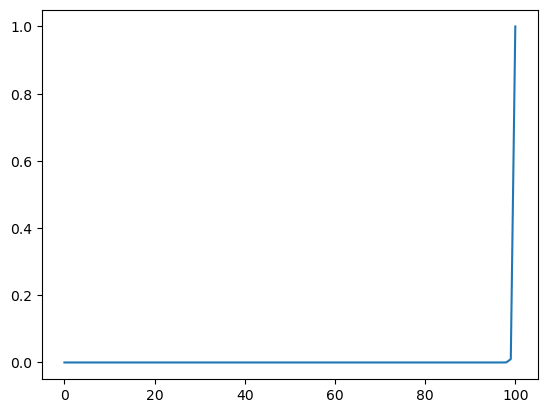

'\nfor j in collection:\n    print(eigenvectors[:,j], end="\n\n")\n'

In [264]:
N = 100

if N/(2*H) >= 0.5:
    i_min = N - H
    i_max = H
else:
    i_min = 0
    i_max = N

M = create_matrix(N)
print(2*H,N, N/(2*H), end="\n\n")

eigenvalues, eigenvectors = LA.eig(M)
eigenvectors_inverse = LA.inv(eigenvectors)

D = np.diag(eigenvalues)

num = LA.norm(np.matmul(eigenvectors, eigenvectors_inverse) - np.identity(len(eigenvalues)))
print(num)

P = initial_vector(i_min, i_max, 100)
print(P)
print(LA.norm(P))

a = np.matmul(eigenvectors_inverse,P)

k = 100
D_k = np.diag(np.array([x**k for x in eigenvalues]))

a = np.matmul(D_k,a)
    
a = np.matmul(eigenvectors, a)
print(LA.norm(a))
print(a)

plt.figure()
plt.plot(P)
plt.show()

plt.figure()
plt.plot(a)
plt.show()

        
"""
for j in collection:
    print(eigenvectors[:,j], end="\n\n")
"""

In [233]:
matriz_a = [[1, 2, 3],
            [4, 4, 6],
            [1, 8, 9]]

matriz_a_inv = LA.inv(matriz_a)
print(matriz_a_inv)

[[-1.          0.5         0.        ]
 [-2.5         0.5         0.5       ]
 [ 2.33333333 -0.5        -0.33333333]]


In [229]:
resultado

array([[ 58,  64],
       [139, 154]])